###**Closing Price of Stocks & Volume Trading**

###Import Libraries and Explore Dataset

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Stock Time Series'
companies = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

total = pd.DataFrame()
for file in companies:
  single_df = pd.read_csv(path+"/"+file)
  total = pd.concat([total, single_df])
total.shape

In [ ]:
total.head()

In [ ]:
total.dtypes

In [ ]:
total['date']=pd.to_datetime(total['date'])

In [ ]:
total.head()

In [ ]:
total.dtypes

In [ ]:
total.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

###Analyze Closing Price of all the Stocks

---

In [ ]:
Names = total['Name'].unique()

In [ ]:
plt.figure(figsize=(20,15))
for i, companies in enumerate(Names,1):
    plt.subplot(2, 2, i)
    df=total[total['Name']==companies]
    plt.plot(df['date'],df['close'])
    plt.title(companies)

###Analyze the Total Volume of Stocks Traded by Date

---

In [ ]:
import plotly.express as px

In [ ]:
for companies in Names:
    df=total[total['Name']==companies]
    graph = px.line(df, x='date', y='volume', title=companies)
    graph.show()

###Analyze Daily Price Change for Apple

---


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Time Series/AAPL_data.csv')
df.head()

In [ ]:
#Daily Price = Close-Open

In [ ]:
df['DailyPriceChange'] = df['close'] - df['open']

In [ ]:
df.head()

In [ ]:
df['Daily%Return'] = df['DailyPriceChange']*100/df['close']

In [ ]:
df.head()

In [ ]:
plot = px.line((df, x='date', y='Daily%Return', title=''))
plot.show()

###Analyze Monthly Mean of 'close' Feature

---

In [ ]:
dfclose = df.copy()

In [ ]:
dfclose['date']=pd.to_datetime(dfclose['date'])

In [ ]:
dfclose.set_index('date', inplace=True)

In [ ]:
dfclose.head()

In [ ]:
dfclose['close'].resample('M').mean().plot()

###Correlation of Stock Prices of Amazon, Apple, Google and Microsoft

In [ ]:
apple = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Time Series/AAPL_data.csv')
amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Time Series/AMZN_data.csv')
google = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Time Series/GOOG_data.csv')
microsoft = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Time Series/MSFT_data.csv')

In [ ]:
close=pd.DataFrame()

In [ ]:
close['aapl'] = apple['close']
close['amzn'] = amazon['close']
close['goog'] = google['close']
close['msft'] = microsoft['close']

In [ ]:
close.head()

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data=close)

Correlations identified between (Apple and Microsoft), (Amazon and Microsoft), (Microsoft and Google)

In [ ]:
sns.heatmap(close.corr(), annot=True)

Numeric Correlation

###Daily Return of each Stock and their correlation

---

In [ ]:
data=pd.DataFrame()

In [ ]:
data['apple_change']=(apple['close']-apple['open'])*100/apple['close']
data['amazon_change']=(amazon['close']-amazon['open'])*100/amazon['close']
data['google_change']=(google['close']-google['open'])*100/google['close']
data['microsoft_change']=(microsoft['close']-microsoft['open'])*100/microsoft['close']

In [ ]:
data.head()

In [ ]:
sns.pairplot(data=data)

In [ ]:
sns.heatmap(data.corr(), annot=True)

Numeric Correlation

###Risk Analysis for Apple

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



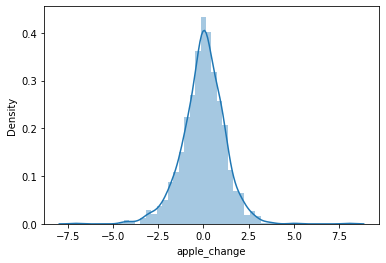

In [ ]:
sns.distplot(data['apple_change'])

The graph resemples a Normal Distribution. That means that 68% of the data should be in range (-1std, 1std). 95% of the data should be in range (-2std, 2std) and 99.7% in range (-3std, 3std).

In [ ]:
data['apple_change'].std()
### 68% of dataset

1.1871377131421237

In [ ]:
data['apple_change'].std()*2
### 95% of dataset

2.3742754262842474

In [ ]:
data['apple_change'].std()*3
### 99.7% of dataset

3.561413139426371

In [ ]:
data['apple_change'].quantile(0.1)

-1.4246644227944307

90% of the time the daily loss will not exceed the above amount.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amazon_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
google_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
microsoft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
